In [1]:
# bibliotecas importadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# The dataset contains data from every bovespa's stock of every useful day starting from 1998 to the end of 2018.
# https://www.kaggle.com/friedliver/bovespa
bov = pd.read_csv('../datasets/bovespa1998-2019.csv',low_memory=False)

# Análise Exploratória

In [3]:
bov.head()

,TIPREG,DATPRG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
0,1,1998-01-02,96,PAL 3,20,PAUL F LUZ,ON *,NaN,R$,135.10,...,2,78187,10934.70,0.0,0,9999-12-31,1000,0,BRPALFACNOR9,141
1,1,1998-01-02,62,CMI 4,30,CMIG,PN *EJ,30.0,R$,50.28,...,10,4500000,226994.92,0.0,0,9999-12-31,1000,0,BRCMIGACNPR3,168
2,1,1998-01-02,62,PET 3,30,PETR,ON *,30.0,R$,211.29,...,2,1000000,211294.20,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
3,1,1998-01-02,62,SHA 4,30,SHAP,PN *,30.0,R$,0.84,...,2,500000000,415449.00,0.0,0,9999-12-31,1000,0,BRSHAPACNPR7,128
4,1,1998-01-02,62,TEL 4,30,TELB,PN *,30.0,R$,132.42,...,2,2000000,264835.74,0.0,0,9999-12-31,1000,0,BRTELBACNPR9,127


In [4]:
# Features
bov.columns

Index(['TIPREG', 'DATPRG', 'CODBDI', 'CODNEG', 'TPMERC', 'NOMRES', 'ESPECI',
       'PRAZOT', 'MODREF', 'PREABE', 'PREMAX', 'PREMIN', 'PREMED', 'PREULT',
       'PREOFC', 'PREOFV', 'TOTNEG', 'QUATOT', 'VOLTOT', 'PREEXE', 'INDOPC',
       'DATVEN', 'FATCOT', 'PTOEXE', 'CODISI', 'DISMES'],
      dtype='object')

# Significado das Colunas:<br>
**TIPREG**: Registry type<br>
**DATPRG**: Trading day<br>
**CODBDI**: BDI code<br>
**CODNEG**: Stock negotiation code<br>
**TPMERC**: Market type<br>
**NOMRES**: Short name of the stock issuing company<br>
**ESPECI**: Stock specification<br>
**PRAZOT**: Term in days of the market<br>
**MODREF**: Reference currency<br>
**PREABE**: Stock price on stock exchange opening<br>
**PREMAX**: Maximum stock price during trading day<br>
**PREMIN**: Minimum stock price during trading day<br>
**PREMED**: Average stock price during trading day<br>
**PREULT**: Last negotiation price of the stock during trading day<br>
**PREOFC**: Best buying offer price of the stock during trading day<br>
**PREOFV**: Best selling offer price of the stock during trading day<br>
**TOTNEG**: Number of negotiations done regarding the stock during trading day<br>
**QUATOT**: Total quantity of "títulos" negotiated<br>
**VOLTOT**: Total volume of "títulos" negotiated<br>
**PREEXE**: Stock option price<br>
**INDOPC**: Correction indicator<br>
**DATVEN**: Expiring date for stock options<br>
**FATCOT**: Quotation factor<br>
**PTOEXE**: Price in points<br>
**CODISI**: Stock code<br>
**DISMES**: Distribution number of the stock<br>

In [5]:
bov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822484 entries, 0 to 5822483
Data columns (total 26 columns):
TIPREG    int64
DATPRG    object
CODBDI    int64
CODNEG    object
TPMERC    int64
NOMRES    object
ESPECI    object
PRAZOT    float64
MODREF    object
PREABE    float64
PREMAX    float64
PREMIN    float64
PREMED    float64
PREULT    float64
PREOFC    float64
PREOFV    float64
TOTNEG    int64
QUATOT    int64
VOLTOT    float64
PREEXE    float64
INDOPC    int64
DATVEN    object
FATCOT    int64
PTOEXE    int64
CODISI    object
DISMES    int64
dtypes: float64(10), int64(9), object(7)
memory usage: 1.1+ GB


In [6]:
# Dados Ausentes
bov.isna().sum()

TIPREG          0
DATPRG          0
CODBDI          0
CODNEG          0
TPMERC          0
NOMRES          4
ESPECI          9
PRAZOT    2954915
MODREF          0
PREABE          0
PREMAX          0
PREMIN          0
PREMED          0
PREULT          0
PREOFC          0
PREOFV          0
TOTNEG          0
QUATOT          0
VOLTOT          0
PREEXE          0
INDOPC          0
DATVEN          0
FATCOT          0
PTOEXE          0
CODISI          0
DISMES          0
dtype: int64

In [7]:
# Entendendo a coluna PRAZOT
bov['PRAZOT'].value_counts()

0.0      1987031
30.0      210200
60.0      130756
90.0       98980
16.0       50452
          ...   
539.0          1
551.0          1
412.0          1
397.0          1
477.0          1
Name: PRAZOT, Length: 460, dtype: int64

In [8]:
#Petroleo Brasileiro SA Petrobras
#BVMF: PETR3

bov.loc[(bov['CODNEG']=='PETR3')]

,TIPREG,DATPRG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
19327,1,1998-03-16,2,PETR3,10,PETROBRAS,ON *,NaN,R$,218.00,...,31,3350000,724584.3,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
19746,1,1998-03-17,2,PETR3,10,PETROBRAS,ON *,NaN,R$,216.00,...,13,4410000,953560.1,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
20260,1,1998-03-18,2,PETR3,10,PETROBRAS,ON *,NaN,R$,219.00,...,79,22800000,5008169.7,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
20789,1,1998-03-19,2,PETR3,10,PETROBRAS,ON *,NaN,R$,217.00,...,38,12070000,2604468.3,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
21173,1,1998-03-20,2,PETR3,10,PETROBRAS,ON *,NaN,R$,223.50,...,26,8500000,1824445.1,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
21678,1,1998-03-23,2,PETR3,10,PETROBRAS,ON *,NaN,R$,216.00,...,29,3330000,707699.5,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
22206,1,1998-03-24,2,PETR3,10,PETROBRAS,ON *,NaN,R$,212.00,...,25,8550000,1806631.0,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
22709,1,1998-03-25,2,PETR3,10,PETROBRAS,ON *ED,NaN,R$,207.00,...,13,4540000,942320.0,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,138
23189,1,1998-03-26,2,PETR3,10,PETROBRAS,ON *ED,NaN,R$,204.79,...,20,8740000,1779389.5,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,138
23636,1,1998-03-27,2,PETR3,10,PETROBRAS,ON *ED,NaN,R$,205.02,...,22,2210000,453218.3,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,138


In [9]:
# Reduzindo o dataset para somente algumas ações
sec = ['ABEV3','PETR3','VALE3','CIEL3','PSSA3']
bov = bov[bov['CODNEG'].isin(sec)]

In [10]:
# Transformando a coluna de data para o formato certo
pd.to_datetime(bov['DATPRG'])

19274     1998-03-16
19327     1998-03-16
19713     1998-03-17
19746     1998-03-17
20219     1998-03-18
             ...    
5820419   2018-12-28
5820754   2018-12-28
5820868   2018-12-28
5821599   2018-12-28
5821730   2018-12-28
Name: DATPRG, Length: 17242, dtype: datetime64[ns]

In [11]:
bov.head()

,TIPREG,DATPRG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
19274,1,1998-03-16,2,VALE3,10,VALE R DOCE,ON,NaN,R$,24.5,...,22,14700,359021.0,0.0,0,9999-12-31,1,0,BRVALEACNOR0,150
19327,1,1998-03-16,2,PETR3,10,PETROBRAS,ON *,NaN,R$,218.0,...,31,3350000,724584.3,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
19713,1,1998-03-17,2,VALE3,10,VALE R DOCE,ON,NaN,R$,24.6,...,28,42300,1049284.0,0.0,0,9999-12-31,1,0,BRVALEACNOR0,150
19746,1,1998-03-17,2,PETR3,10,PETROBRAS,ON *,NaN,R$,216.0,...,13,4410000,953560.1,0.0,0,9999-12-31,1000,0,BRPETRACNOR9,137
20219,1,1998-03-18,2,VALE3,10,VALE R DOCE,ON,NaN,R$,25.0,...,22,32300,821252.0,0.0,0,9999-12-31,1,0,BRVALEACNOR0,150


In [12]:
# Tipo das ações
bov['ESPECI'].value_counts()

ON           6380
ON NM        5326
ON N1        3214
ON *          520
ON EJ         443
ON EJ NM      248
ON EDJ NM     141
ON ED         130
ON N2         129
ON ED NM      107
ON EDJ N1     104
ON EJ N1       96
ON INT NM      73
ON EDJ         69
ON EB NM       64
ON EJD         32
ON *EDJ        32
ON EJ N2       26
ON ED N1       24
ON EB N1       24
ON EB          16
ON ATZ N1       8
ON ES           8
ON *ED          8
ON EG           8
ON EG NM        8
ON EX           2
ON ERJ          1
ON ERJ N2       1
Name: ESPECI, dtype: int64

In [13]:
# Removendo colunas
temp = bov.drop(['TIPREG', 'CODBDI', 'TPMERC', 'TOTNEG', 'QUATOT', 'VOLTOT', 'INDOPC', 'DATVEN',
                 'FATCOT', 'PTOEXE', 'CODISI', 'DISMES'], axis=1)

In [14]:
df = temp.copy()

In [15]:
df.head()

,DATPRG,CODNEG,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,PREEXE
19274,1998-03-16,VALE3,VALE R DOCE,ON,NaN,R$,24.5,24.55,24.0,24.42,24.55,24.10,24.49,0.0
19327,1998-03-16,PETR3,PETROBRAS,ON *,NaN,R$,218.0,218.00,215.0,216.29,215.03,215.02,216.99,0.0
19713,1998-03-17,VALE3,VALE R DOCE,ON,NaN,R$,24.6,25.20,24.6,24.80,25.20,24.70,25.60,0.0
19746,1998-03-17,PETR3,PETROBRAS,ON *,NaN,R$,216.0,219.00,216.0,216.22,219.00,217.00,218.99,0.0
20219,1998-03-18,VALE3,VALE R DOCE,ON,NaN,R$,25.0,25.75,25.0,25.42,25.75,21.00,25.85,0.0


In [16]:
# Selecionando o período
start_date='2018-01-01'
end_date='2018-12-28'
mask = (df['DATPRG'] > start_date) & (df['DATPRG'] <= end_date)

In [17]:
df = df.loc[mask]
df.head()

,DATPRG,CODNEG,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,PREEXE
5242448,2018-01-02,PETR3,PETROBRAS,ON,NaN,R$,16.99,17.33,16.98,17.22,17.33,17.28,17.33,0.0
5242508,2018-01-02,PSSA3,PORTO SEGURO,ON NM,NaN,R$,36.33,36.65,36.17,36.44,36.40,36.37,36.40,0.0
5242913,2018-01-02,VALE3,VALE,ON EJ NM,NaN,R$,40.44,41.74,40.44,41.28,41.72,41.70,41.72,0.0
5243524,2018-01-02,CIEL3,CIELO,ON EJ NM,NaN,R$,23.54,24.38,23.54,24.13,24.09,24.07,24.09,0.0
5243697,2018-01-02,ABEV3,AMBEV S/A,ON EJ,NaN,R$,21.33,21.75,21.17,21.60,21.69,21.69,21.70,0.0


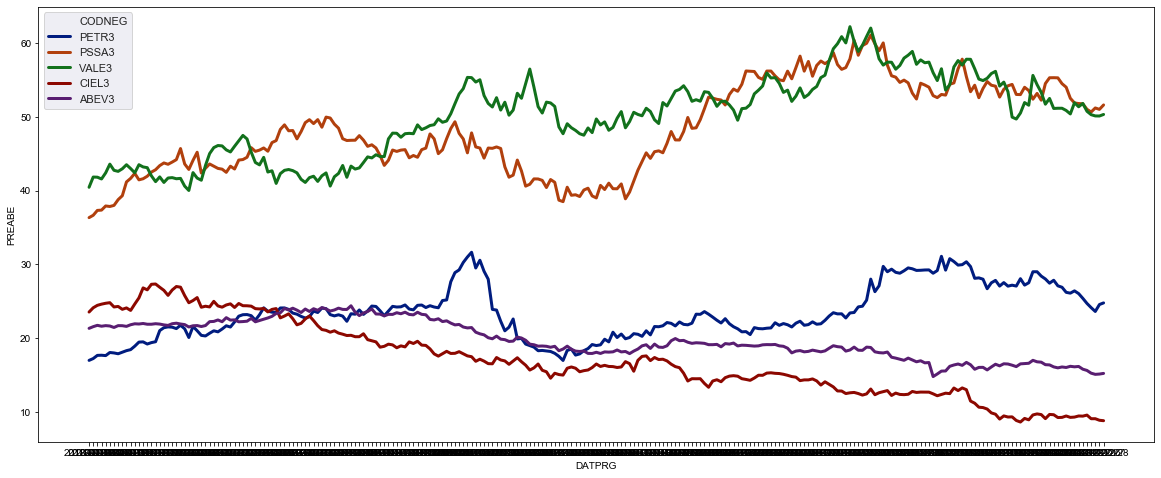

In [18]:
# Gráfico com a evolução dos preços das ações em 2018
fig, ax = plt.subplots(figsize=(20,8))
sns.set(style='darkgrid',palette='dark',rc={"lines.linewidth":3})
sns.lineplot(x='DATPRG',y='PREABE',hue='CODNEG',data=df);

# Modelos

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import tree, svm, neighbors, ensemble
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Calculando o retorno logaritmico
df['logabe'] = np.log(df['PREABE'])
df['logmin'] = np.log(df['PREMIN'])
df['change'] = df['logabe'].subtract(df['logmin'])

In [21]:
# Pivot Table com as ações
change = df.pivot_table(values='change',index='DATPRG',columns='CODNEG')

In [22]:
change.head()

CODNEG,ABEV3,CIEL3,PETR3,PSSA3,VALE3
DATPRG,,,,,
2018-01-02,0.007529,0.000000,0.000589,0.004414,0.000000
2018-01-03,0.000000,0.000000,0.001742,0.004101,0.012751
2018-01-04,0.011566,0.012346,0.002266,0.012677,0.006960
2018-01-05,0.003707,0.015974,0.005101,0.008875,0.006274
2018-01-08,0.009725,0.017129,0.001702,0.013010,0.000000


In [24]:
# Função Predição
def score(self, X, y):
    y_pred = self.predict(X)
    return (y_pred==y).mean()

In [25]:
# Função Split
def createXy(e):
    X = change[e].values
    pos = np.ceil(len(X)*0.01).astype(int)
    y = X > np.sort(X, axis=0)[::-1][pos]
    return X.reshape(-1, 1), y

In [26]:
# Dicionário de modelos
clf = {'Tree': tree.DecisionTreeClassifier(),
       'SGD Hinge L1': SGDClassifier(loss="hinge", penalty="l1"),
       '5-NN': neighbors.KNeighborsClassifier(5),
       'SVC': svm.SVC(gamma='scale'),
       'Naive Bayes': GaussianNB(),
      'Random Forest': RandomForestClassifier()}

In [27]:
# Dividindo dataset
scores_clf = pd.DataFrame(index=clf.keys(), columns=change.columns)
for el in change:
    for key in clf:
        X, y = createXy(el)
        this_scores = cross_val_score(clf[key], X, y, cv=5, scoring=score)
        scores_clf.loc[key, el] = this_scores.mean()

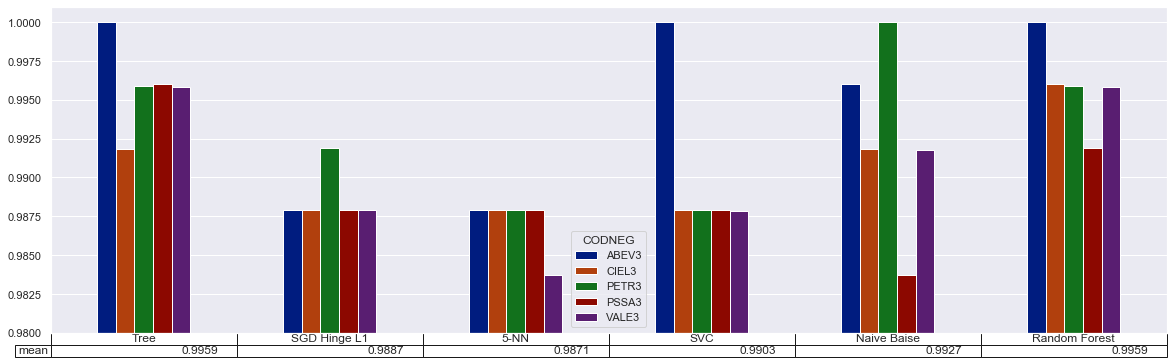

In [30]:
# Gráfico com o score médio de cada modelo
table = pd.DataFrame(scores_clf.mean(axis=1).round(4), columns=['mean'], index=scores_clf.index).T

fig, ax = plt.subplots(1, 1, figsize=(20,6))

ax.get_xaxis().set_visible(False)
ax.set_ylim(0.98,1.001)
scores_clf.plot(table=table, ax=ax,kind='bar');